# Differential Equations

A differential equation is a mathematical equation that relates a function with its derivatives. In simpler terms, it describes how a quantity changes in relation to another quantity. Differential equations are fundamental in various fields such as physics, engineering, and economics, as they model dynamic systems and processes.

## Euler's Method

Euler's method is a simple and widely used numerical technique for solving ordinary differential equations (ODEs) with a given initial value. It is particularly useful for approximating solutions to first-order ODEs of the form:
$$\frac{dy}{dx} = f(x, y)$$
with an initial condition $y(x_0) = y_0$.

Let's consider an example,
$$\frac{dy}{dx} = x + y$$
$$y(0) = 1$$

Let's import libraries first,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Our differential equation,
$$\frac{dy}{dx} = x + y$$

In [2]:
def f(x, y):
    return x + y

And our euler function,

In [3]:
def euler_method(f, x0, y0, h=0.1, n=100):
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n):
        y0 = y0 + h * f(x0, y0)
        x0 = x0 + h
        x_values.append(x0)
        y_values.append(y0)
    
    return np.array(x_values), np.array(y_values)

Let's plot and visualize the results,

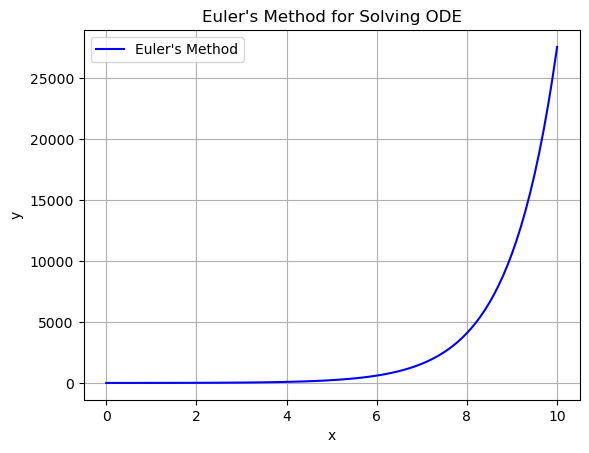

In [4]:
# Initial conditions and parameters
x0 = 0
y0 = 1
h = 0.1  # Step size
n = 100  # Number of steps
x_values, y_values = euler_method(f, x0, y0, h, n)

# Plotting the results
plt.plot(x_values, y_values, label="Euler's Method", color='blue')
plt.title("Euler's Method for Solving ODE")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

## Runge-Kutta Method

The Runge-Kutta methods are a family of iterative methods used to solve ordinary differential equations (ODEs). The most commonly used version is the fourth-order Runge-Kutta method (RK4), which provides a good balance between accuracy and computational efficiency.

In [5]:
def runge_kutta_4th_order(f, y0, x0, x1, h):
    """
    y0: Initial value of y at x0
    x0: Initial value of x
    x1: Final value of x
    h: Step size
    f: Function that returns dy/dt given t and y
    """
    n = int((x1 - x0) / h)
    x_values = np.linspace(x0, x1, n + 1)
    y_values = np.zeros(n + 1)
    y_values[0] = y0

    for i in range(n):
        x = x_values[i]
        y = y_values[i]
        
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        
        y_values[i + 1] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return x_values, y_values

Let's plot it,

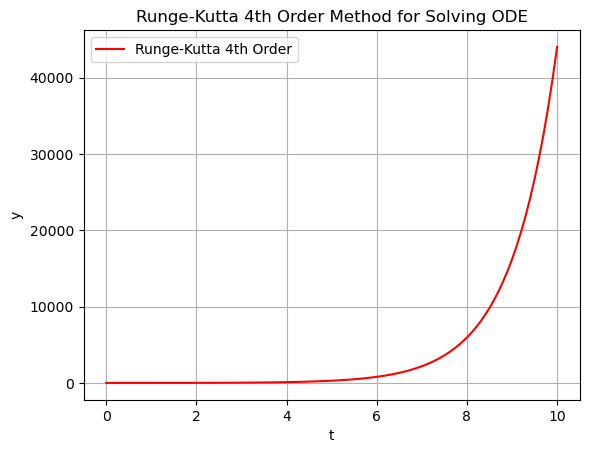

In [6]:
# Initial conditions and parameters for RK4
y0 = 1
x0 = 0
x1 = 10
h = 0.1
x_values, y_values_rk4 = runge_kutta_4th_order(f, y0, x0, x1, h)

# Plotting the results of RK4
plt.plot(x_values, y_values_rk4, label="Runge-Kutta 4th Order", color='red')
plt.title("Runge-Kutta 4th Order Method for Solving ODE")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()